In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("/export/home/oblum/projects/ld_gan")

%matplotlib inline
import matplotlib.pylab as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10, 5)

In [17]:
import ld_gan.utils.utils as ld
import ld_gan
from shutil import copyfile
from tqdm import tqdm

In [4]:
fnames = ld.listdir("data/faceScrub/imgs_top_aligned/", ".jpg", True)

In [5]:
fnames_train = [fname for fname in fnames if "_test" not in fname]
fnames_test = [fname for fname in fnames if "_test" in fname]

In [19]:
for fname in tqdm(fnames_test):
    fname_new = fname.replace("imgs_top_aligned", "imgs_top_aligned_test")
    path_new = os.path.join(*fname_new.split("/")[:-1])
    ld.mkdir(path_new)
    copyfile(fname, fname_new)


  0%|          | 0/6906 [00:00<?, ?it/s]

100%|██████████| 6906/6906 [02:37<00:00, 45.57it/s]


In [20]:
print len(fnames_train)
print len(fnames_train) + len(fnames_test)
print len(fnames)

62397
69303
69303


In [21]:
for fname in tqdm(fnames_train):
    fname_new = fname.replace("imgs_top_aligned", "imgs_top_aligned_train")
    path_new = os.path.join(*fname_new.split("/")[:-1])
    ld.mkdir(path_new)
    copyfile(fname, fname_new)

100%|██████████| 62397/62397 [11:01<00:00, 94.37it/s]


In [7]:
fname = fnames_test[0]

In [9]:
fname_new = fname.replace("imgs_top_aligned", "imgs_top_aligned_test")

In [10]:
fname_new

'data/faceScrub/imgs_top_aligned_test/Aaron_Eckhart/Aaron_Eckhart_100_test.jpg'

In [13]:
path_new = os.path.join(*fname_new.split("/")[:-1])

In [14]:
path_new

'data/faceScrub/imgs_top_aligned_test/Aaron_Eckhart'

In [5]:
import ld_gan

In [ ]:
ld_gan.data_proc.data_loader.live_loader(path, batch_size)

In [6]:
import os
import torch.utils.data as data
import torch
import numpy as np
import scipy.misc

def dataset_loader(path, batch_size, file_type = '.jpg', resize=128):

    def listdir(path, file_type = None):
        if file_type is None:
            file_type = ""

        fnames = []
        dirs = [path]
        while len(dirs) > 0:
            path = dirs.pop()
            content = [os.path.join(path, n) for n in os.listdir(path)]
            dirs = [c for c in content if os.path.isdir(c)] + dirs
            fnames += [c for c in content if file_type in c]

        return sorted(fnames)

    
    class CustomDataset(data.Dataset):
        def __init__(self, path, file_type='.jpg'):
            
            # get fnames
            self.fnames = listdir(path, file_type)
            
            # get label vec
            classes = {}
            for c, c_name in enumerate(sorted(os.listdir(path))):
                classes[c_name] = c
            self.labels = np.array([classes[name.split("/")[-2]] for name in self.fnames])
            
        def __getitem__(self, index):
            
            x = scipy.misc.imread(self.fnames[index])
            x = scipy.misc.imresize(x, (resize, resize))
            x = x.transpose(2, 0, 1)
            y = self.labels[index]
            return x, y
            
        def __len__(self):
            # You should change 0 to the total size of your dataset.
            return len(self.fnames) 

    # Then, you can just use prebuilt torch's data loader. 
    train_loader = torch.utils.data.DataLoader(dataset=CustomDataset(path, file_type),
                                               batch_size=batch_size, 
                                               shuffle=True,
                                               num_workers=1)
    
    return train_loader

In [7]:
loader = dataset_loader("data/faceScrub/imgs_top_aligned/", 4)

In [13]:
np.mean([1,2])

1.5

In [10]:
from torch.autograd import Variable
from tqdm import tqdm
import ld_gan.utils.utils as ld

  0%|          | 0/17326 [00:00<?, ?it/s]

torch.Size([4, 3, 128, 128])


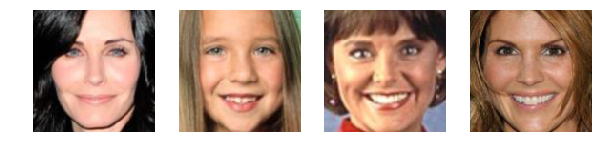


 112
 498
  19
 354
[torch.LongTensor of size 4]




  0%|          | 1/17326 [00:02<10:05:42,  2.10s/it]

torch.Size([4, 3, 128, 128])


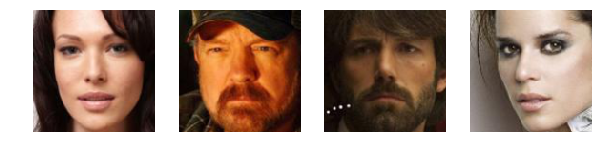


 162
 255
  45
 407
[torch.LongTensor of size 4]



Process Process-2:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/net/hciserver03/storage/oblum/venvs/compvisgpu01/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
    return recv()


KeyboardInterrupt: 

  File "/net/hciserver03/storage/oblum/venvs/compvisgpu01/lib/python2.7/site-packages/torch/multiprocessing/queue.py", line 21, in recv
    buf = self.recv_bytes()
KeyboardInterrupt


In [11]:
for x, y in tqdm(loader):
    print x.shape
    arr = (Variable(x).data).cpu().numpy()
    arr = arr.transpose(0, 2, 3, 1)
    ld.disp(arr)
    print y
    raw_input()